In [31]:
import pymc as pm
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd

In [2]:
count_data = np.loadtxt('.\\txtdata.csv')

In [3]:
n_count_data = len(count_data)

(array([12., 19., 18., 11.,  7.,  2.,  1.,  2.,  0.,  2.]),
 array([ 0. ,  7.2, 14.4, 21.6, 28.8, 36. , 43.2, 50.4, 57.6, 64.8, 72. ]),
 <a list of 10 Patch objects>)

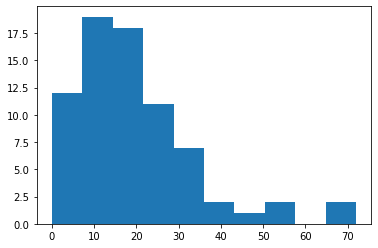

In [4]:
plt.hist(count_data)

In [11]:
alpha = 1 / count_data.mean()
lambda_1 = pm.Exponential('lambda_1', alpha)
lambda_2 = pm.Exponential('lambda_2', alpha)
lambda_3 = pm.Exponential('lambda_3', alpha)

In [12]:
tau_1 = pm.DiscreteUniform('tau_1', lower=0, upper=n_count_data - 1)
tau_2 = pm.DiscreteUniform('tau_2', lower=tau_1, upper=n_count_data)

In [13]:
@pm.deterministic
def lambda_(tau_1=tau_1, tau_2=tau_2, lambda_1=lambda_1, lambda_2=lambda_2, lambda_3=lambda_3):
    out = np.zeros(n_count_data)
    out[:tau_1] = lambda_1
    out[tau_1:tau_2] = lambda_2
    out[tau_2:] = lambda_3
    return out

In [14]:
observation = pm.Poisson('obs', lambda_, value=count_data, observed=True)

In [15]:
model = pm.Model([lambda_1, lambda_2, lambda_3, tau_1, tau_2, lambda_, observation])

In [16]:
mcmc = pm.MCMC(model)

In [17]:
mcmc.sample(40000, 10000, 1)

 [-----------------100%-----------------] 40000 of 40000 complete in 9.1 sec

In [19]:
def moving_average(a, n=3):
    ret=np.cumsum(a, dtype=np.float)
    ret[n:] = ret[n:] - ret[:-n]
    return ret[n-1:]  /n

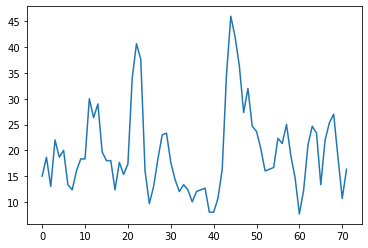

In [30]:
plt.plot(moving_average(count_data))

In [20]:
lambda_1_samples = mcmc.trace(lambda_1)[:]
lambda_2_samples = mcmc.trace(lambda_2)[:]
lambda_3_samples = mcmc.trace(lambda_3)[:]
tau_1_samples = mcmc.trace(tau_1)[:]
tau_2_samples = mcmc.trace(tau_2)[:]

(array([9.0200e+02, 4.9000e+01, 4.0000e+00, 0.0000e+00, 5.0000e+00,
        2.0970e+03, 2.6267e+04, 4.4900e+02, 2.0700e+02, 2.0000e+01]),
 array([24. , 25.3, 26.6, 27.9, 29.2, 30.5, 31.8, 33.1, 34.4, 35.7, 37. ]),
 <a list of 10 Patch objects>)

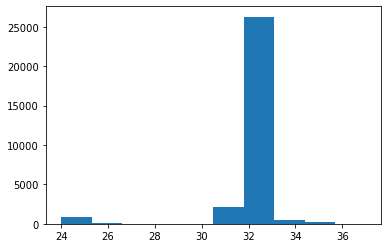

In [21]:
plt.hist(tau_1_samples)

(array([ 3789.,     0.,     0.,  7140.,     0.,     0., 15526.,     0.,
            0.,  3545.]),
 array([42. , 42.3, 42.6, 42.9, 43.2, 43.5, 43.8, 44.1, 44.4, 44.7, 45. ]),
 <a list of 10 Patch objects>)

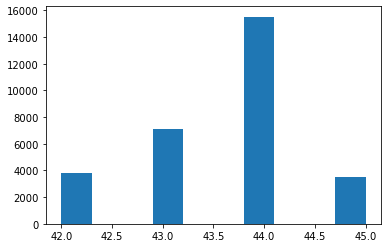

In [22]:
plt.hist(tau_2_samples)

In [36]:
(lambda_1_samples < lambda_2_samples).mean()

1.0

In [23]:
lambda_1_samples.mean()

20.139147833732803

In [24]:
lambda_2_samples.mean()

11.377055091552727

In [25]:
lambda_2_samples.mean()

11.377055091552727

(array([2.0000e+00, 0.0000e+00, 5.0000e+00, 0.0000e+00, 1.6000e+01,
        0.0000e+00, 1.1090e+03, 0.0000e+00, 3.1460e+03, 1.1509e+04]),
 array([39. , 39.5, 40. , 40.5, 41. , 41.5, 42. , 42.5, 43. , 43.5, 44. ]),
 <a list of 10 Patch objects>)

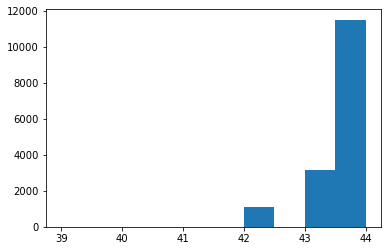

In [45]:
plt.hist(tau_samples[tau_samples < 45])

In [26]:
tau_1_samples.mean()

31.768

In [27]:
tau_2_samples.mean()

43.62756666666667

In [32]:
# Z-score - folosit mult pentru monitoring irl